In [7]:
import pandas as pd
import numpy as np
import os
print(os.environ['IEX_TOKEN'])

pk_2f841cbff2d6422ab0145ada59fa5d34


In [282]:
# Finance data time
from datetime import datetime
from iexfinance.stocks import get_historical_data

start = datetime(2019, 1, 1)
end = datetime(2019, 12, 31)
pd.options.display.float_format = '{:,.2f}'.format
df = pd.DataFrame(get_historical_data("GOOG", start, end, close_only=True)).transpose()

In [283]:
def pos_streaker(x):
    global count
    if(x > 0):
        count += 1
    else:
        count = 0
    return count

In [284]:
def neg_streaker(x):
    global count
    if(x <= 0):
        count += 1
    else:
        count = 0
    return count

In [285]:
def strat_builder(x):
    if(x['up_streaks'] > 3):
        return 1
    elif x['down_streaks'] > 3:
        return -1
    else:
        return 0

In [286]:
df['log_returns'] = np.log(df['close']/df['close'].shift(1))
day_series = pd.date_range(start, end, freq='D').to_series()
day_series_dow = day_series.dt.dayofweek
df['ups'] = np.where(df['log_returns'] > 0, 1, 0)
df['downs'] = np.where(df['log_returns'] <= 0, 1, 0)
df['date'] = df.index
count = 0 
df['up_streaks'] = df['log_returns'].apply(pos_streaker)
df['down_streaks'] = df['log_returns'].apply(neg_streaker)
df['dow'] = pd.to_datetime(df['date'], errors='coerce').dt.day_name()
df['strat'] = df.apply(strat_builder, axis=1)
df[:20]

,close,volume,log_returns,ups,downs,date,up_streaks,down_streaks,dow,strat
2019-01-02,"1,045.85","1,532,608.00",nan,0,0,2019-01-02,0,0,Wednesday,0
2019-01-03,"1,016.06","1,841,066.00",-0.03,0,1,2019-01-03,0,1,Thursday,0
2019-01-04,"1,070.71","2,093,894.00",0.05,1,0,2019-01-04,1,0,Friday,0
2019-01-07,"1,068.39","1,981,874.00",-0.00,0,1,2019-01-07,0,1,Monday,0
2019-01-08,"1,076.28","1,765,267.00",0.01,1,0,2019-01-08,1,0,Tuesday,0
2019-01-09,"1,074.66","1,199,272.00",-0.00,0,1,2019-01-09,0,1,Wednesday,0
2019-01-10,"1,070.33","1,456,421.00",-0.00,0,1,2019-01-10,0,2,Thursday,0
2019-01-11,"1,057.19","1,520,756.00",-0.01,0,1,2019-01-11,0,3,Friday,0
2019-01-14,"1,044.69","1,144,263.00",-0.01,0,1,2019-01-14,0,4,Monday,-1
2019-01-15,"1,077.15","1,463,570.00",0.03,1,0,2019-01-15,1,0,Tuesday,0


In [287]:
up_counts = df['up_streaks'].value_counts(normalize=True)
up_counts

0   0.47
1   0.22
2   0.13
3   0.07
4   0.04
5   0.03
6   0.02
7   0.01
8   0.01
9   0.00
Name: up_streaks, dtype: float64

In [288]:
down_counts = df['down_streaks'].value_counts(normalize=True)
down_counts

0   0.53
1   0.22
2   0.13
3   0.07
4   0.03
5   0.02
6   0.00
Name: down_streaks, dtype: float64

In [289]:
# To do return strategy from that
df['strat_returns'] = np.cumsum(df['strat'] * df['log_returns'])
df['passive_returns'] = np.cumsum(df['log_returns'])

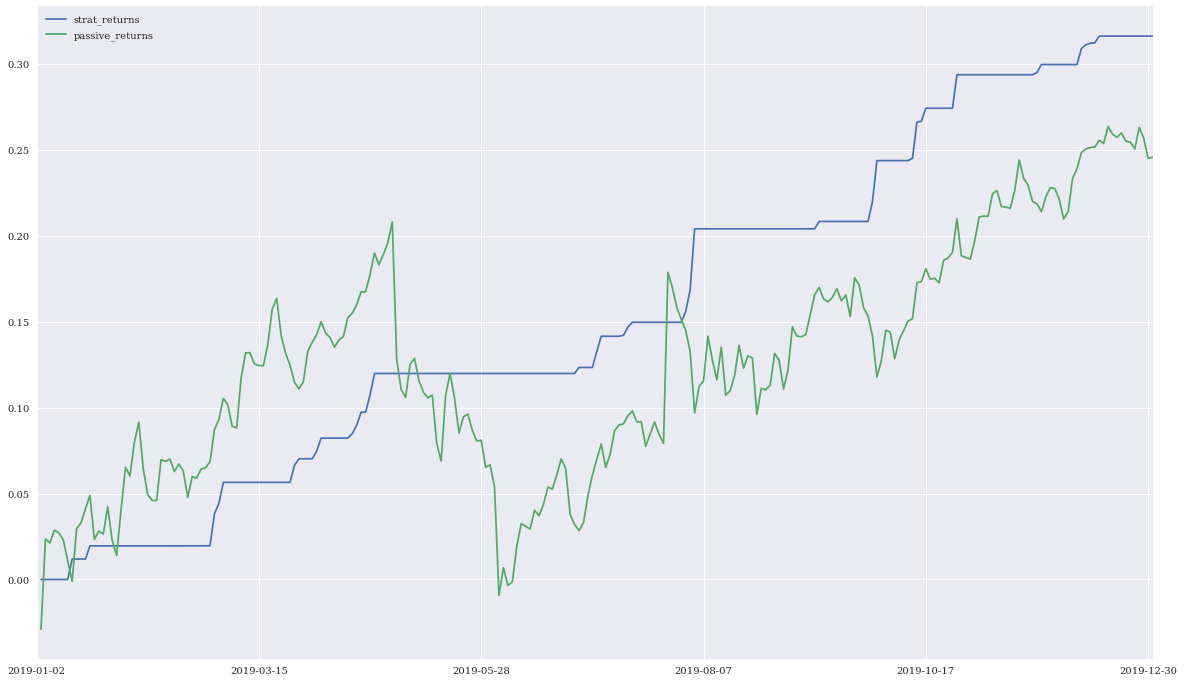

In [290]:
strat_plot = pd.DataFrame([df['strat_returns'], df['passive_returns']])
strat_plot = strat_plot.transpose()
strat_plot.plot(figsize=(20,12))

In [ ]:
# TO DO next- drop and group to just Fridays to Mondays